In [ ]:
pip install pytorch_lightning --quiet

In [1]:
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms

from model import HybridModel
from vocabulary import Vocabulary

/Users/joglekar/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


wet <start> there one red passenger there taking airplane there people . <end>


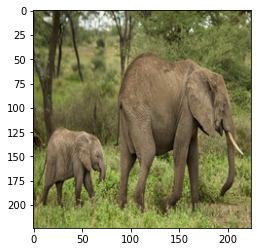

In [2]:
def load_image(image_file_path, transform=None):
    img = Image.open(image_file_path).convert('RGB')
    img = img.resize([224, 224], Image.LANCZOS)
    plt.imshow(np.asarray(img))
    if transform is not None:
        img = transform(img).unsqueeze(0)
    return img

# Prepare an image
image_file_path = 'sample.png'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), 
                         (0.229, 0.224, 0.225))])
img = load_image(image_file_path, transform)

hybrid_model = HybridModel.load_from_checkpoint("lightning_logs/version_0/checkpoints/epoch=4-step=784.ckpt")
token_ints = hybrid_model.get_caption(img)
token_ints = token_ints[0].cpu().numpy()

# Convert ints to strings
with open('coco_data/vocabulary.pkl', 'rb') as f:
    vocabulary = pickle.load(f)
predicted_caption = []
for token_int in token_ints:
    token = vocabulary.int_to_token[token_int]
    predicted_caption.append(token)
    if token == '<end>':
        break
predicted_sentence = ' '.join(predicted_caption)

# Print out the generated caption
print(predicted_sentence)